## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokene(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия? 

In [1]:
# подгружаем корпус

corpus = open('lenta.txt').read()

In [2]:
# импорт всяких разных библиотек, загрузка списка стоп-слов

import nltk
nltk.download('punkt_tab')
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize

import re
from collections import Counter

from nltk.corpus import stopwords
russian_stopwords = set(stopwords.words('russian'))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\irina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
# функция, которая ловит пятиграммы

def ngrammer(tokens, n=5):
    ngrams = []
    for i in range(len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

In [4]:
# первый способ посчитать пятиграммы

sentences = sent_tokenize(corpus, language='russian')
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
tokenized_sentences = [[token.lower() for token in sentence if not re.match('\W+', token)] 
                       for sentence in tokenized_sentences]

bigram_counts_1 = Counter()
for sentence in tokenized_sentences:
    bigram_counts_1.update(ngrammer([token for token in sentence if token not in russian_stopwords]))

bigram_counts_1.most_common(20)

[('объединенной группировки войск северном кавказе', 83),
 ('сообщает риа новости ссылкой пресс-службу', 57),
 ('обязанности президента россии владимир путин', 47),
 ('группировки федеральных сил северном кавказе', 37),
 ('помощник президента россии сергей ястржембский', 35),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 30),
 ('штабе объединенной группировки федеральных сил', 25),
 ('министр иностранных дел россии игорь', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('иностранных дел россии игорь иванов', 23),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('главного управления борьбе организованной преступностью', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('заместитель начальника генштаба вооруженных сил', 20)

In [12]:
# второй способ посчитать пятиграммы

tokenized = word_tokenize(corpus, preserve_line = True, language = 'russian')
tokenized = [token.lower() for token in tokenized if not re.match('\W+', token)]

bigram_counts_2 = Counter()
bigram_counts_2.update(ngrammer([token for token in tokenized if token not in russian_stopwords]))

bigram_counts_2.most_common(20)

[('сообщает риа новости ссылкой пресс-службу', 57),
 ('объединенной группировки войск северном кавказе', 56),
 ('обязанности президента россии владимир путин', 46),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 29),
 ('объединенной группировки войск северном кавказе.', 27),
 ('министр иностранных дел россии игорь', 24),
 ('штабе объединенной группировки федеральных сил', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('помощник президента россии сергей ястржембский', 21),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('группировки федеральных сил северном кавказе', 20),
 ('заместитель начальника генштаба вооруженных сил', 20),
 ('сообщает федеральное агентство новостей ссылкой'

Между bigram_counts_1.most_common(20) и bigram_counts_2.most_common(20) есть небольшие различия в частотностях пятиграмм.

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2022)

Вставьте сюда скриншот

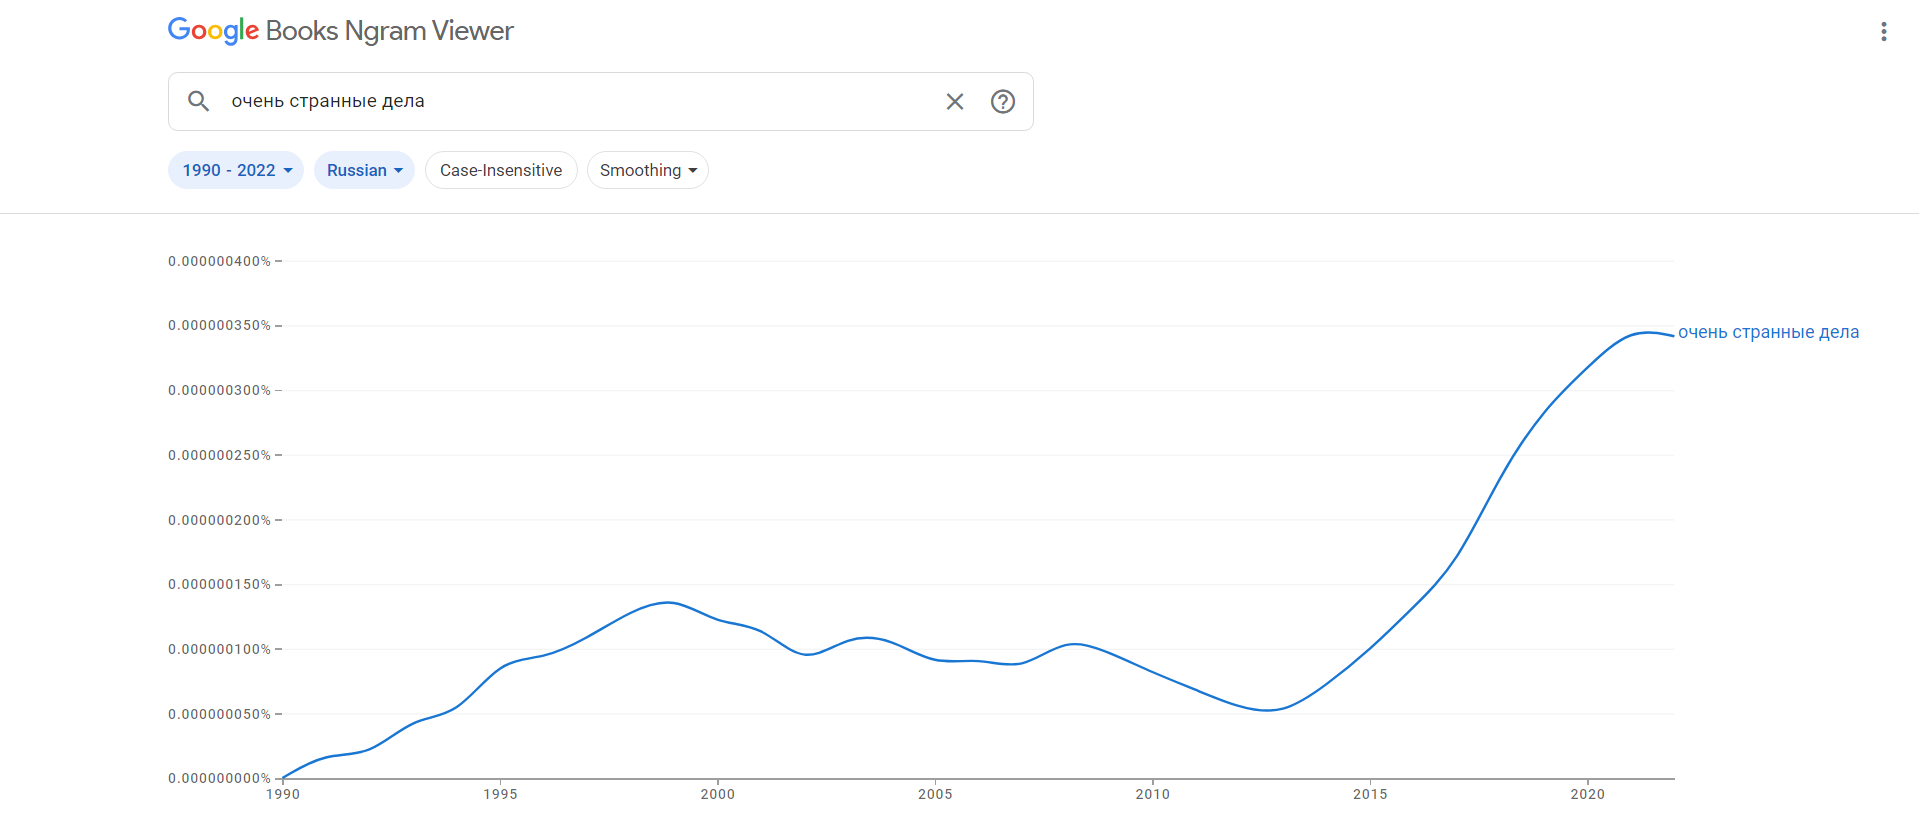

По графику видно, что частотность этой трехграммы начинает значительно возрастать примерно с 2016 года - это год, в который начал выходить сериал "Очень странные дела".

## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [19]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

In [13]:
# импорт дополнительного модуля для логарифма

import math

In [17]:
# количество слов в корпусе - его мы впишем в качестве параметра в обновленную функцию

len(tokenized)

1493813

In [20]:
# функция, которая ловит биграммы

def bigrammer(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

In [24]:
# функция со счетчиками

def collect_stats(corpus, stops):
    
    unigrams = Counter()
    bigrams = Counter()
    
    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(bigrammer(sent, 2, stops))
    
    return unigrams, bigrams

In [25]:
# функция, которая идет по всем биграммам и вычисляет метрику

def score_bigrams(unigrams, bigrams, scorer, threshold=-100000):
    bigram2score = Counter()
    
    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], 
                       bigrams[bigram])
        
        ## если метрика выше порога, добавляем в словарик
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score

In [26]:
unigrams, bigrams = collect_stats(tokenized_sentences, russian_stopwords)

In [27]:
# пробуем предыдущим скорером

bigram2score = score_bigrams(unigrams, bigrams, scorer_simple)
bigram2score.most_common(10)

[('сопоцкина друскеник', 0.5),
 ('неприятель приблизившись', 0.5),
 ('саноку обстреливалась', 0.5),
 ('м.ю лермонтова', 0.5),
 ('австрийский аэроплан', 0.5),
 ('показывался аэроплан-птица', 0.5),
 ('das ist', 0.5),
 ('ist nesteroff', 0.5),
 ('песнь нестерове', 0.5),
 ('могучий унесся', 0.5)]

In [30]:
# обновленный скорер

def scorer_not_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        corpus_length = 1493813                                                               # количество слов в корпусе
        bigram_probability = bigram_count/corpus_length                                       # вероятность биграммы
        word_a_probability = word_count_a/corpus_length                                       # вероятность слова a
        word_b_probability = word_count_b/corpus_length                                       # вероятность слова b
        score = math.log2((bigram_probability)/(word_a_probability*word_b_probability))       # итоговая формула
    except ZeroDivisionError:
        return 0
    return score

In [31]:
# пробуем обновленным скорером

bigram2score = score_bigrams(unigrams, bigrams, scorer_not_simple)
bigram2score.most_common(10)

[('сопоцкина друскеник', 20.510568127854185),
 ('неприятель приблизившись', 20.510568127854185),
 ('саноку обстреливалась', 20.510568127854185),
 ('м.ю лермонтова', 20.510568127854185),
 ('австрийский аэроплан', 20.510568127854185),
 ('показывался аэроплан-птица', 20.510568127854185),
 ('das ist', 20.510568127854185),
 ('ist nesteroff', 20.510568127854185),
 ('песнь нестерове', 20.510568127854185),
 ('могучий унесся', 20.510568127854185)]

Результаты полностью совпадают (только сами метрики различаются - поскольку мы меняли формулу для расчета метрик). Результаты совпадают, поскольку в обновленной формуле мы всего лишь домножали предыдущую формулу на константу (размер корпуса) и брали от нее логарифм по основанию 2 - от этого ранжирование биграмм не могло измениться (если биграмма X была частотнее биграммы Y по предыдущей метрике, то она и осталась частотнее по обновленной метрике).

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов. 

In [32]:
def scorer_not_simple_new(word_count_a, word_count_b, bigram_count, *args):
    try:
        corpus_length = 1493813                                                                                     # количество слов в корпусе
        bigram_probability = bigram_count/corpus_length                                                             # вероятность биграммы
        word_a_probability = word_count_a/corpus_length                                                             # вероятность слова a
        word_b_probability = word_count_b/corpus_length                                                             # вероятность слова b
        score = math.log2(bigram_probability) - math.log2(word_a_probability) - math.log2(word_b_probability)       # итоговая формула
    except ZeroDivisionError:
        return 0
    return score

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы

In [35]:
import gensim

Дефолтные скоринговые функции - 'default', 'npmi'.

In [91]:
# пробуем default

ph = gensim.models.phrases.Phrases(sentences, min_count = 1, threshold = 0.5, scoring = 'default')

p = gensim.models.phrases.Phraser(ph)

ph2 = gensim.models.phrases.Phrases(p[tokenized_sentences],  min_count = 1, threshold = 0.5, scoring = 'default')
p2 = gensim.models.phrases.Phraser(ph2)

p2[p[tokenized_sentences[0]]]

['бои',
 'у',
 'сопоцкина',
 'и',
 'друскеник',
 'закончились',
 'отступлением',
 'германцев']

In [92]:
# пробуем npmi

ph = gensim.models.phrases.Phrases(sentences, min_count = 1, threshold = 0.5, scoring = 'npmi')

p = gensim.models.phrases.Phraser(ph)

ph2 = gensim.models.phrases.Phrases(p[tokenized_sentences],  min_count = 1, threshold = 0.5, scoring = 'npmi')
p2 = gensim.models.phrases.Phraser(ph2)

p2[p[tokenized_sentences[0]]]

['бои',
 'у',
 'сопоцкина',
 'и',
 'друскеник_закончились',
 'отступлением_германцев']